In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm

# Class for Sigmoid Neuron

In [3]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self, x):
    return np.dot(x,self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1-y_pred) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1-y_pred) 
  
  def fit(self, X, Y, epochs=1, lr = 1, initialize = True, display_loss = False):
    if initialize:
      self.w = np.random.rand(1,X.shape[1]) #(row,col)
      self.b = 0
        
    if display_loss:
        loss = []
     
    for i in tqdm(range(epochs), total = epochs,unit ="epoch"):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= lr * dw
      self.b -= lr * db
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss.append(mean_squared_error(Y_pred,Y))
             
    if display_loss:
        plt.plot(loss)
        plt.xlabel("Epochs")
        plt.ylabel("Mean Squared Error")
        plt.show()
        
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

# Load Data

In [4]:
data = pd.read_csv('db/mobile_cleaned.csv')

In [5]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [6]:
data.shape

(341, 88)

In [7]:
X = data.drop('Rating',axis = 1)
Y = data['Rating']

In [8]:
X.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,0,1,0,0,0,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,0,1,0,0,0,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,0,1,0,0,0,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,0,1,0,0,0,0,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,0,1,0,0,0,1


In [9]:
Y.head()

0    4.5
1    4.5
2    4.4
3    4.3
4    4.4
Name: Rating, dtype: float64

Convert to numpy arrays

In [10]:
X = X.values
Y = Y.values
print(type(X),type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [11]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [12]:
data['Class'].value_counts(normalize = True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [13]:
Y_binarized = data['Class'].values

# Standardisation

Data can be of different ranges(Note pixel density and internal memory for example)

    We try to have a dataset
    1. Each column have zero mean.
    2. Standard Deviation of 1

**Here is an example to demonstrate the standardisation process**

In [14]:
R = np.random.random([100,1])

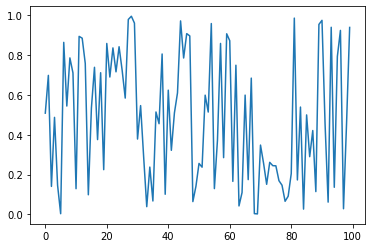

In [15]:
plt.plot(R)
plt.show()

In [16]:
np.mean(R)

0.48113679596302705

In [17]:
np.std(R)

0.32026517413076316

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
scaler.mean_

array([0.4811368])

In [21]:
RT = scaler.transform(R)

In [22]:
np.mean(RT) # ALMOST ZERO

9.325873406851315e-17

In [23]:
np.std(RT) #Exactly One

0.9999999999999999

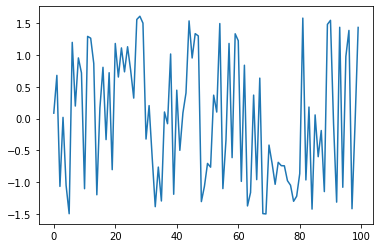

In [24]:
plt.plot(RT)
plt.show()

Note the x axis. Mean is 0.

**Back to our dataset**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 0,stratify = Y_binarized)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(255, 87)
(86, 87)
(255,)


In [27]:
scaler = StandardScaler()

We compute the mean and std on Training Data and then apply it to both train and test because after fitting in training dataset we would want the same fitting on the test dataset.

In [28]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test  = scaler.transform(X_test)

We have to convert the Y data in such a way it fits Sigmoid range.

We use MinMaxScaler which maps the minimum to 0 and the maximum to 1

In [29]:
minmax_scaler = MinMaxScaler()

In [30]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))

In [31]:
np.max(Y_scaled_train),np.min(Y_scaled_train)

(1.0, 0.0)

In [32]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1,1))

Now we have done the standardization we have to change the threshold also

In [33]:
scaled_threshold = list(minmax_scaler.transform(np.asarray([threshold]).reshape(-1,1)))[0][0]

In [34]:
scaled_threshold

0.6800000000000002

Now we have to binarise it

In [35]:
Y_binarized_train = (Y_scaled_train > scaled_threshold).astype('int').ravel() # ravel for flattening

In [36]:
Y_binarized_test = (Y_scaled_test > scaled_threshold).astype('int').ravel() # ravel for flattening

# Fit 

In [37]:
sn = SigmoidNeuron()

100%|██████████| 2000/2000 [00:15<00:00, 126.69epoch/s]


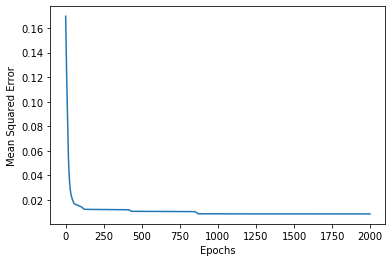

In [38]:
sn.fit(X_scaled_train,Y_scaled_train,epochs = 2000,lr = 0.015,display_loss=True)

In [39]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [40]:
Y_pred_binarized_train = (Y_pred_train > scaled_threshold).astype('int').ravel()
Y_pred_binarized_test = (Y_pred_test > scaled_threshold).astype('int').ravel() # ravel for flattening# ravel for flattening

In [41]:
accuracy_train = accuracy_score(Y_pred_binarized_train,Y_binarized_train)
accuracy_test = accuracy_score(Y_pred_binarized_test,Y_binarized_test)

In [42]:
print(accuracy_train,accuracy_test)

0.8431372549019608 0.8372093023255814
